<a href="https://colab.research.google.com/github/Shreyash-Jagdale/Classification---Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shreyash Sunil Jagdale
##### **Team Member 2 -** Shubham Shankar Panaskar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Shreyash-Jagdale/Classification---Credit-Card-Default-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# mount colab to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Projects/credit card/default of credit card clients.csv')


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 30001 rows and 25 columns


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f' There are {df.duplicated().sum()} duplicate values in the dataset')

 There are 0 duplicate values in the dataset


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

<Axes: >

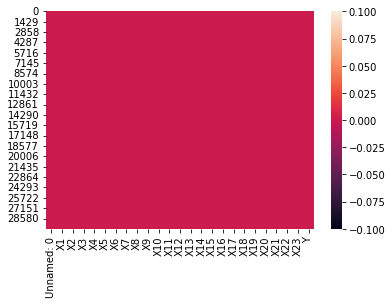

In [11]:
# Visualizing the missing values
sns.heatmap(df.isnull())

<Axes: >

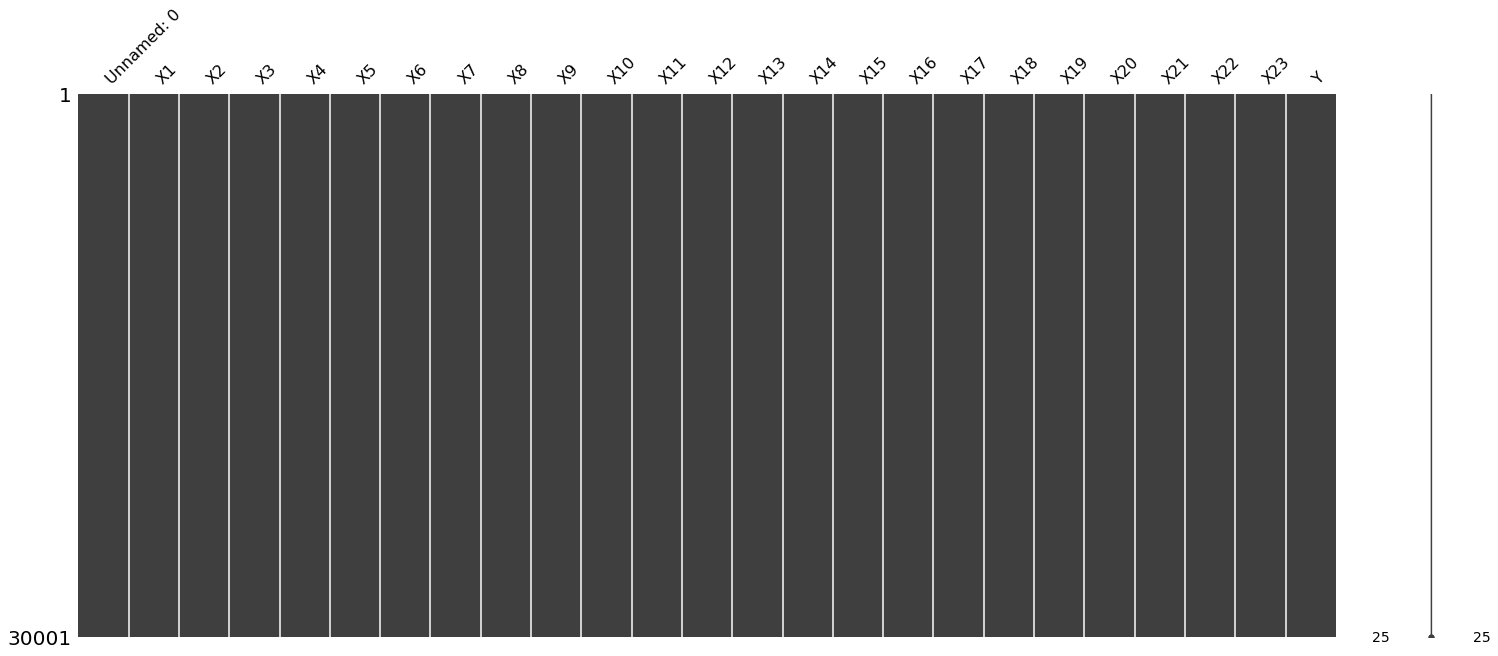

In [12]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

* Our dataset has 30001 rows and 25 columns
* Datatype of all the variables is object
* There are no duplicate values in the dataset
* No column contain any null or missing value.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [14]:
# rename the columns of dataset
column_dict = dict.fromkeys(df.columns ,df.loc[0])
df = df.rename(columns = column_dict['Unnamed: 0'])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [15]:
# delete first row as it is row of column names
df = df.drop(0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
# renaming column names with suitable ones 
df.rename(columns = 
    { 'LIMIT_BAL' : 'Max_credit_given' ,
      'PAY_0' : 'Pay_Status_Sept' , 
      'PAY_2' : 'Pay_Status_Aug' , 
      'PAY_3' : 'Pay_Status_July' , 
      'PAY_4' : 'Pay_Status_June' , 
      'PAY_5' : 'Pay_Status_May' , 
      'PAY_6' : 'Pay_Status_April' , 
      'BILL_AMT1' : 'Bill_Amt_Sept' ,
      'BILL_AMT2' : 'Bill_Amt_Aug' , 
      'BILL_AMT3' : 'Bill_Amt_July' , 
      'BILL_AMT4' : 'Bill_Amt_June' , 
      'BILL_AMT5' : 'Bill_Amt_May' , 
      'BILL_AMT6' : 'Bill_Amt_April' ,
      'PAY_AMT1' : 'Amt_Paid_Sept' ,
      'PAY_AMT2' : 'Amt_Paid_Aug' ,
      'PAY_AMT3' : 'Amt_Paid_July' ,
      'PAY_AMT4' : 'Amt_Paid_June' ,
      'PAY_AMT5' : 'Amt_Paid_May' ,
      'PAY_AMT6' : 'Amt_Paid_April' ,  
      'default payment next month' : 'target'
     
    } ,inplace = True
    
)

In [17]:
# list of new column names
df.columns

Index(['ID', 'Max_credit_given', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Pay_Status_Sept', 'Pay_Status_Aug', 'Pay_Status_July',
       'Pay_Status_June', 'Pay_Status_May', 'Pay_Status_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_June',
       'Bill_Amt_May', 'Bill_Amt_April', 'Amt_Paid_Sept', 'Amt_Paid_Aug',
       'Amt_Paid_July', 'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April',
       'target'],
      dtype='object')

In [18]:
# convert data type of all the variables to integer
convert_dict = {'Max_credit_given' : int , 'SEX' : int , 'EDUCATION' : int , 'MARRIAGE' : int , 'AGE' : int , 'Pay_Status_Sept' : int ,
       'Pay_Status_Aug' : int , 'Pay_Status_July' : int , 'Pay_Status_June' : int , 'Pay_Status_May' : int , 'Pay_Status_April' : int ,
       'Bill_Amt_Sept' : int , 'Bill_Amt_Aug' : int , 'Bill_Amt_July' : int , 'Bill_Amt_June' : int ,
       'Bill_Amt_May' : int , 'Bill_Amt_April' : int , 'Amt_Paid_Sept' : int , 'Amt_Paid_Aug' : int ,
       'Amt_Paid_July' : int , 'Amt_Paid_June' : int , 'Amt_Paid_May' : int , 'Amt_Paid_April' : int ,
       'target' : int }
df = df.astype(convert_dict)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                30000 non-null  object
 1   Max_credit_given  30000 non-null  int64 
 2   SEX               30000 non-null  int64 
 3   EDUCATION         30000 non-null  int64 
 4   MARRIAGE          30000 non-null  int64 
 5   AGE               30000 non-null  int64 
 6   Pay_Status_Sept   30000 non-null  int64 
 7   Pay_Status_Aug    30000 non-null  int64 
 8   Pay_Status_July   30000 non-null  int64 
 9   Pay_Status_June   30000 non-null  int64 
 10  Pay_Status_May    30000 non-null  int64 
 11  Pay_Status_April  30000 non-null  int64 
 12  Bill_Amt_Sept     30000 non-null  int64 
 13  Bill_Amt_Aug      30000 non-null  int64 
 14  Bill_Amt_July     30000 non-null  int64 
 15  Bill_Amt_June     30000 non-null  int64 
 16  Bill_Amt_May      30000 non-null  int64 
 17  Bill_Amt_Apr

In [20]:
df.head()

,ID,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April,target
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
# Dataset Describe
df.describe()

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
df.nunique()

ID                  30000
Max_credit_given       81
SEX                     2
EDUCATION               7
MARRIAGE                4
AGE                    56
Pay_Status_Sept        11
Pay_Status_Aug         11
Pay_Status_July        11
Pay_Status_June        11
Pay_Status_May         10
Pay_Status_April       10
Bill_Amt_Sept       22723
Bill_Amt_Aug        22346
Bill_Amt_July       22026
Bill_Amt_June       21548
Bill_Amt_May        21010
Bill_Amt_April      20604
Amt_Paid_Sept        7943
Amt_Paid_Aug         7899
Amt_Paid_July        7518
Amt_Paid_June        6937
Amt_Paid_May         6897
Amt_Paid_April       6939
target                  2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# make a copy of dataset for some manipulations
df_copy = df.copy()

In [24]:
# define a function to one hot encode the sex , education and marriage variables

# for sex
def change_sex_values(data):
  if data == 1:
    data = 'Male'
  else:
    data = 'Female'
  return data 



In [25]:
# for eduction
def change_edu_values(data):
  if data == 1:
    data = 'Graduate School'
  elif data == 2:
    data = 'University'
  elif data == 3:
    data = 'High School'
  else:
    data = 'Others'
  return data


In [26]:
# for marriage
def change_marriage_values(data):
  if data == 1:
    data = 'Married'
  elif data == 2:
    data = 'Single'
  else:
    data = 'Others'
  return data

In [27]:
# using lambda function to apply defined functions to respective columns
df_copy['SEX'] = df_copy['SEX'].apply(lambda x : change_sex_values(x))
df_copy['EDUCATION'] = df_copy['EDUCATION'].apply(lambda x : change_edu_values(x))
df_copy['MARRIAGE'] = df_copy['MARRIAGE'].apply(lambda x : change_marriage_values(x))

In [28]:
# count of how many are defualts
target_count = pd.DataFrame(df_copy.target.value_counts())
target_count

,target
0,23364
1,6636


In [29]:
# count of users by their gender
sex_count = pd.DataFrame(df_copy.SEX.value_counts())
sex_count

,SEX
Female,18112
Male,11888


In [30]:
# count of users by their education
edu_count =  pd.DataFrame(df_copy.EDUCATION.value_counts())
edu_count

,EDUCATION
University,14030
Graduate School,10585
High School,4917
Others,468


In [31]:
# count of users by their marital status
marriage_count = pd.DataFrame(df_copy.MARRIAGE.value_counts())
marriage_count

,MARRIAGE
Single,15964
Married,13659
Others,377


In [32]:
# number of defaults based on their sex
df_copy.groupby(['SEX' , 'target']).size().unstack(1)

target,0,1
SEX,,
Female,14349,3763
Male,9015,2873


In [33]:
# number of defaults based on their education
df_copy.groupby(['EDUCATION' , 'target']).size().unstack(1)

target,0,1
EDUCATION,,
Graduate School,8549,2036
High School,3680,1237
Others,435,33
University,10700,3330


In [34]:
# number of defaults based on their marital status
df_copy.groupby(['MARRIAGE' , 'target']).size().unstack(0)

MARRIAGE,Married,Others,Single
target,,,
0,10453,288,12623
1,3206,89,3341


In [35]:
# get only those variables which are about repayment status
var = ['Pay_Status_Sept', 'Pay_Status_Aug', 'Pay_Status_July',
       'Pay_Status_June', 'Pay_Status_May', 'Pay_Status_April']
pay_status = df_copy[var]
pay_status.head()

,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,Pay_Status_April
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0


In [36]:
# get only those variables which are about bill amounts per month
var = ['Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 
       'Bill_Amt_June', 'Bill_Amt_May', 'Bill_Amt_April']
bill_amt = df_copy[var]
bill_amt.head()

,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


In [37]:
# get only those variables which are about paid bill amounts per month
var = ['Amt_Paid_Sept', 'Amt_Paid_Aug','Amt_Paid_July', 
       'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April']
bill_paid = df_copy[var]
bill_paid.head()

,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April
1,0,689,0,0,0,0
2,0,1000,1000,1000,0,2000
3,1518,1500,1000,1000,1000,5000
4,2000,2019,1200,1100,1069,1000
5,2000,36681,10000,9000,689,679


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

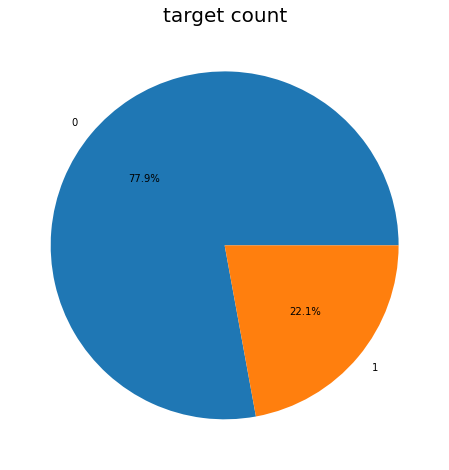

In [38]:
# visualize the count of target
plt.figure(figsize=(16,8))
plt.pie(df_copy.target.value_counts() , labels = df_copy['target'].value_counts().keys() , autopct='%0.1f%%')
plt.title('target count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of those who defaulted and who did not we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

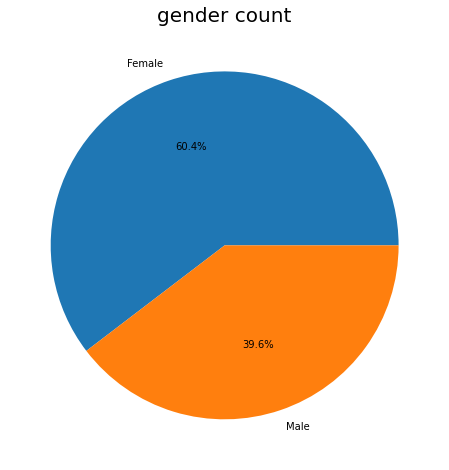

In [39]:
# visualize the gender count
plt.figure(figsize=(16,8))
plt.pie(df_copy.SEX.value_counts() , labels = df_copy.SEX.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('gender count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion male and female we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

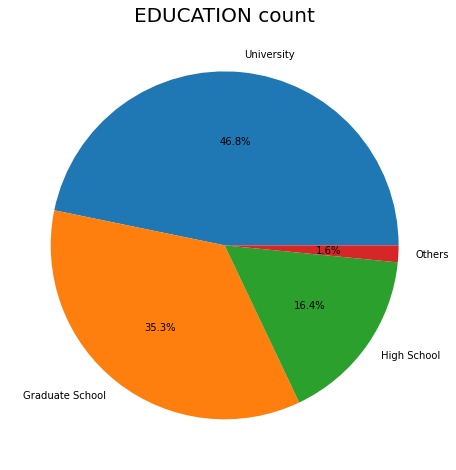

In [40]:
# visualize the education count
plt.figure(figsize=(16,8))
plt.pie(df_copy.EDUCATION.value_counts() , labels = df_copy.EDUCATION.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('EDUCATION count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of different levels of education of users we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

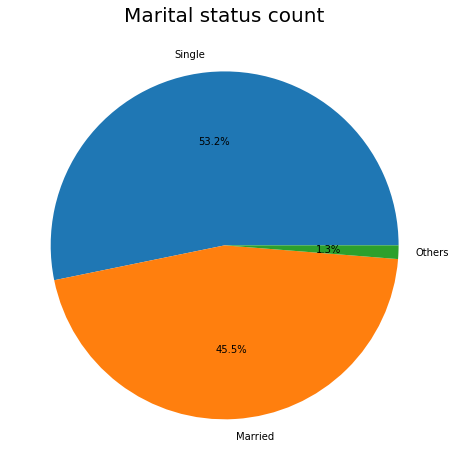

In [42]:
# visualize the MARUTAL STATUS count
plt.figure(figsize=(16,8))
plt.pie(df_copy.MARRIAGE.value_counts() , labels = df_copy.MARRIAGE.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('Marital status count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of different marital status of users we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

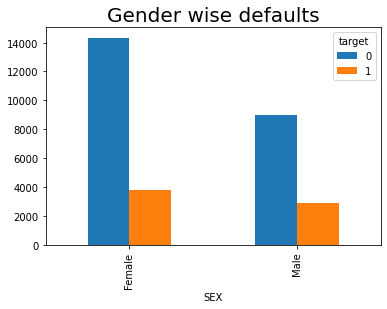

In [62]:
# visualize the proportion of defaults gender wise
df_copy.groupby(['SEX' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Gender wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of male and female defaulters we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

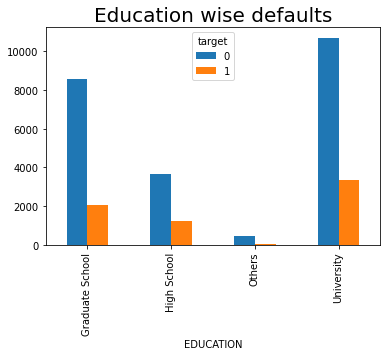

In [60]:
# visualize the proportion of defaults by their education
df_copy.groupby(['EDUCATION' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Education wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of defaulters by their education level we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

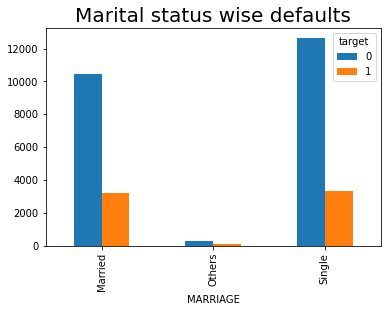

In [59]:
# visualize the proportion of defaults by their marital status
df_copy.groupby(['MARRIAGE' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Marital status wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of defaulters by their marital status we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

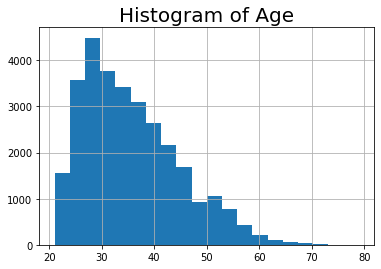

In [66]:
# visualize the age using histogram
df_copy.AGE.hist(bins = 20)
plt.title('Histogram of Age' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram gives the frequency of quantitative variable on the y axis. To visualize how many users belong to patricular age we used histogram

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

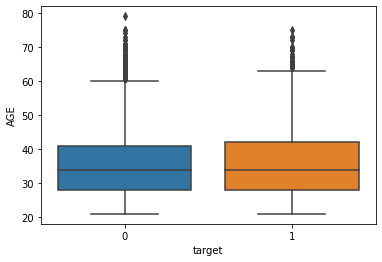

In [63]:
# visualize defaults by age factor using boxplot
sns.boxplot(y = 'AGE' , x = 'target' , data = df_copy)
plt.show()

##### 1. Why did you pick the specific chart?

* Boxplot displays the five-number summary of a set of data. Here to visualize summary of age of defaulters and non defaulters 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

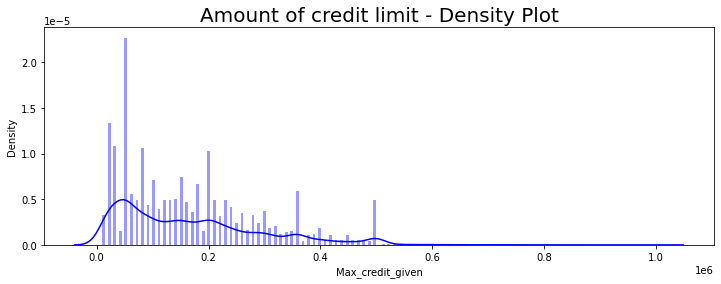

In [65]:
# Chart - 10 visualization code
plt.figure(figsize = (12,4))
sns.distplot(df_copy['Max_credit_given'],kde=True,bins=200, color="blue")
plt.title('Amount of credit limit - Density Plot' , fontsize = 20)
plt.show()


##### 1. Why did you pick the specific chart?

* A Distplot or distribution plot depicts the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***